In [1]:
import scipy.io as sio
mat = sio.loadmat("./imdb/imdb.mat")

Jamie Lee Curtis
30/nm0000130_rm1504221952_1958-11-22_2005.jpg


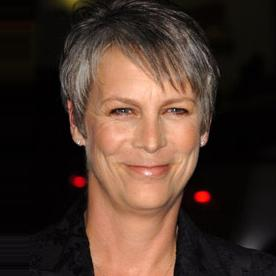

In [2]:
from IPython.core.display import Image 
idx = 11114
path ='./imdb_crop/' + mat['imdb'].item()[2][0][idx][0]
print(mat['imdb'].item()[4][0][idx][0])
print(mat['imdb'].item()[2][0][idx][0])
Image(filename=path)

In [3]:
import numpy
embeddings = numpy.load('./embeddings.npy')
image_list = numpy.load('./image_list.npy')

In [4]:
file2name = {}
for idx in range(0, len(mat['imdb'].item()[2][0])):
    file2name[mat['imdb'].item()[2][0][idx][0]] = mat['imdb'].item()[4][0][idx][0]

In [5]:
cleaned_imagelist = list(map(lambda x: x.split('/')[-2]+'/' + x.split('/')[-1], image_list))

Peter Riegert


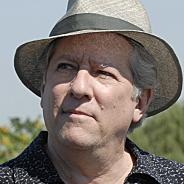

In [6]:
idx = 803
print(file2name[cleaned_imagelist[idx]])
path ='./imdb_crop/' + cleaned_imagelist[idx]
Image(filename=path)

In [19]:
name2file = {}
for file_name, name in file2name.items():
    if name in name2file:
        name2file[name].append(file_name)
    else:
        name2file[name] = [file_name]

In [20]:
img_count = {k:len(v) for k,v in name2file.items()}

In [44]:
import operator
sorted_img_count = sorted(img_count.items(), key=operator.itemgetter(1))

In [80]:
from numpy import percentile
percentile(list(img_count.values()), [0,25,50,75,90,95, 99])

array([  1.  ,   2.  ,   5.  ,  16.  ,  56.  , 107.  , 295.17])

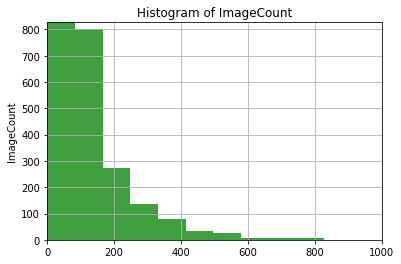

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
n, bins, patches = plt.hist(img_count.values(), 10, facecolor='g', alpha=0.75)


plt.ylabel('ImageCount')
plt.title('Histogram of ImageCount')
plt.axis([0, 1000, 0, sorted_img_count[-1][1]])
plt.grid(True)
plt.show()